In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset of a player's performance over several games (replace with actual data)
data = {
    'Game': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Minutes_Played': [35, 40, 38, 42, 36, 30, 39, 41, 33, 37],
    'Field_Goal_Percentage': [45, 48, 50, 47, 49, 43, 46, 45, 44, 48],
    'Rebounds': [10, 12, 11, 13, 9, 7, 11, 12, 10, 8],
    'Assists': [5, 7, 6, 8, 6, 5, 7, 9, 5, 6],
    'Points': [20, 25, 22, 24, 19, 18, 23, 26, 21, 22]  # Target variable (what we're predicting)
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# 1. Data Preprocessing: Display the dataset
print("Dataset:")
print(df)

Dataset:
   Game  Minutes_Played  Field_Goal_Percentage  Rebounds  Assists  Points
0     1              35                     45        10        5      20
1     2              40                     48        12        7      25
2     3              38                     50        11        6      22
3     4              42                     47        13        8      24
4     5              36                     49         9        6      19
5     6              30                     43         7        5      18
6     7              39                     46        11        7      23
7     8              41                     45        12        9      26
8     9              33                     44        10        5      21
9    10              37                     48         8        6      22


In [3]:
# 2. Split the data into input features (X) and target (y)
X = df[['Minutes_Played', 'Field_Goal_Percentage', 'Rebounds', 'Assists']]  # Independent variables
y = df['Points']  # Dependent variable (target)

In [4]:
# 3. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Building: Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Model Prediction: Predict on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the Model: Using R-squared and Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 4.28
R-squared: -0.07


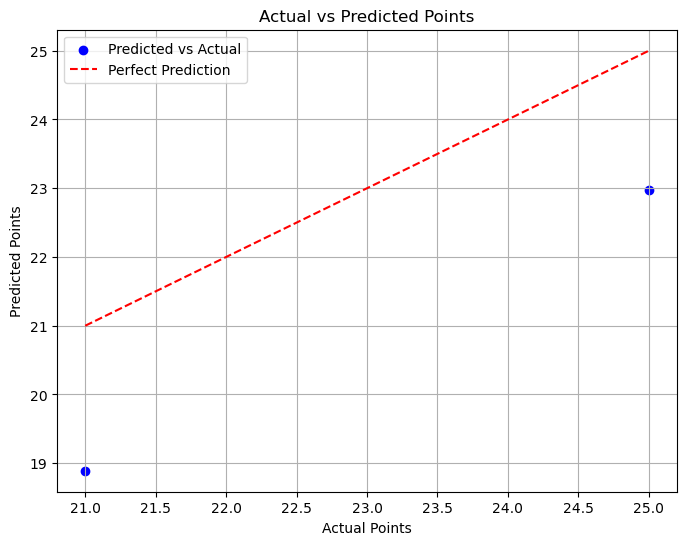

In [5]:
# 7. Visualization: Plot the actual vs predicted points for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()

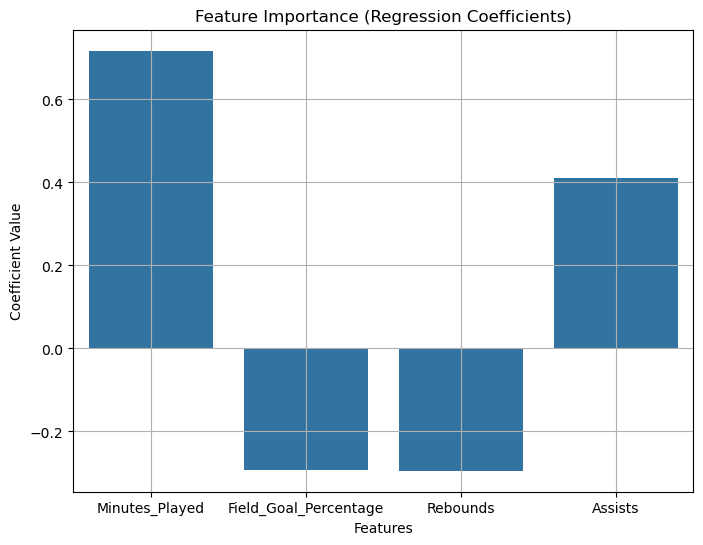

In [6]:
# 8. Visualize the regression coefficients (Feature importance)
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=coefficients)
plt.title('Feature Importance (Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

In [7]:
# 9. Make Predictions for New Data (e.g., predicting the next game performance)
new_data = np.array([[38, 47, 10, 6]])  # New game data (Minutes_Played, Field_Goal_Percentage, Rebounds, Assists)
predicted_points = model.predict(new_data)
print(f"\nPredicted points for the new game: {predicted_points[0]:.2f}")


Predicted points for the new game: 22.01


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
